In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera
# animate, not save
from IPython.display import clear_output

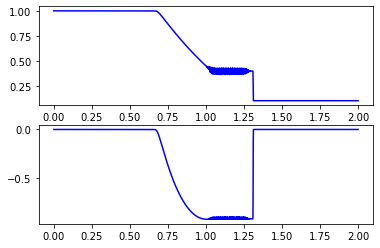

1000 0


In [2]:
# Finite Volume Method

timestep = 1000

# h : waterdepth
# uh : x-momentum
# z : bed elevation.  In this case we set it to z = 0
# w : absolute water level, with w = z + h
# x : the x-axis
#     
# U = np.array(h, uh)
# E = np.array(uh, u**2 * h + g*h**2/2)

# rectangular meshing on 1D is just dividing the interval.
# set to 2000 mesh.
x = np.linspace(0,2,2000)
dx = x[1]-x[0]

# the constants 
g = 9.8             # the gravity constant
eta = 0.018

# Initial condition
# dam break situation
h_up, h_down = np.ones(1000), np.ones(1000)*0.1
h = np.append(h_up, h_down)
uh = h*0
#u = uh*h/(h**2 +10e-6)    # u = uh / h
u = uh/h

#E1 = uh
#E2 = u**2*h + g*h**2/2

# Sfx = u*eta**2 * u / h**(4/3)
#S1 = h*0
# S2 = -g*h*(z_x + Sfx)
#S2 = h*0

# Setting up the quantity vector U
# the x-momentum vector E and source vector S
U = np.vstack((h,uh))
#E = np.vstack((E1,E2))
#S = np.vstack((S2,S2))


# HLL implementation
# pre setup for finite volume method 1-dimension
#Umid = (U[:,1:]+U[:,:-1])/2      # the 'centroid' of the segment
Ai = x[1:] - x[:-1]              # Ai area of the mesh. 
                                 # In case of 1D, it should be the length of intervals.
#E_L, E_R = E[:,1:], E[:,:-1]    # 
#u_L, u_R = u[1:], u[:-1]         #
#h_L, h_R = h[1:], h[:-1]         #
# We will set up time difference later
counter = 0                      # sanity check
fig, axes = plt.subplots(2)
#camera = Camera(fig)

time = 0.0
finaltime = 0.1

while (time <= finaltime):
    # clear_output(wait=True)
    #print(step)
    
    # Calculate Flux
    
    h = U[0,:]
    uh = U[1,:]
    u = uh*h/(h**2 + 1.0e-6)
    
    

    
    E1 = uh
    E2 = u**2*h + g*h**2/2

    # Sfx = u*eta**2 * u / h**(4/3)
    S1 = h*0
    # S2 = -g*h*(z_x + Sfx)
    S2 = h*0

    # Setting up the quantity vector U
    # the x-momentum vector E and source vector S
    #U = np.vstack((h,uh))
    E = np.vstack((E1,E2))
    S = np.vstack((S2,S2))
    
    U_L, U_R = U[:,1:], U[:,:-1]
    E_L, E_R = E[:,1:], E[:,:-1]
    u_L, u_R = u[1:], u[:-1]         #
    h_L, h_R = h[1:], h[:-1]         #    
    
    
    a_plus  = np.maximum(u_L + np.sqrt(g*h_L), u_R + np.sqrt(g*h_R), 0*u_L)
    a_minus = np.minimum(u_L - np.sqrt(g*h_L), u_R - np.sqrt(g*h_R), 0*u_L)
     
    dt  = dx/max(np.max(a_plus),np.max(-a_minus))
    
    time += dt

    
    np.seterr(divide='ignore')
    E_HLL = np.where(np.abs(a_plus - a_minus) > 1.0e-6,\
                     (a_plus * E_L - a_minus * E_R)/(a_plus - a_minus) - a_plus*a_minus/(a_plus- a_minus)*(U_L - U_R), 0.0)
    np.seterr(divide='warn')
    E_HLL = (a_plus * E_L - a_minus * E_R)/(a_plus - a_minus) \
    - a_plus*a_minus/(a_plus- a_minus)*(U_L - U_R)
    
    
    
    E_L, E_R = E_HLL[:,1:], E_HLL[:,:-1]    # 
    
    U[:,1:-1] -= dt/dx*(E_R - E_L) # + dt*S
    
    #  E = ((a_plus * E_L - a_minus * E_R)*(a_plus + a_minus))/(a_plus**2 - a_minus**2+10e-4)
   
    
    # Updating presetup
    #uh = E[0,:],
    #U = (Umid[:,1:] + Umid[:,:-1])/2     # updating U = [h,uh]
    
    
    #U = np.append(U,np.array([[0,0],[0,0]]),1)
    #E = np.append(E,np.array([[0],[0]]),1)
    
    #Umid = (U[:,1:]+U[:,:-1])/2      # the 'centroid' of the segment
    #Ai = x[1:] - x[:-1]              # Ai area of the mesh. 
                                     # In case of 1D, it should be the length of intervals.
 
    
    #axes[0].plot(x,U[0],color='blue')
    #axes[1].plot(x,U[1],color='blue')
    #  plt.show()
    
    ## recording
    # if step%10 == 0:
    #     camera.snap()
    # counter +=1
    
    
axes[0].plot(x,U[0],color='blue')
axes[1].plot(x,U[1],color='blue')
plt.show()

#animation = camera.animate()
# animation = camera.animate(interval = 200, repeat = True,
#                            repeat_delay = 500)
#animation.save('1d-dam.gif', writer = 'imagemagick')
#animation.save('1d-dam.mp4')
print(timestep,counter)

![1d](1d-dam.gif)

In [3]:
U.shape

(2, 2000)

In [4]:
E_L.shape

(2, 1998)

In [5]:
E_R.shape

(2, 1998)

In [6]:
E_L, E_R = E[:,1:], E[:,:-1]

In [7]:
E_L.shape

(2, 1999)

In [8]:
E_R.shape

(2, 1999)